## Impo

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import keras

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
train_set = pd.read_csv('digit-recognizer/train.csv')
test_set = pd.read_csv('digit-recognizer/test.csv')
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
BATCH_SIZE = 256
NO_CLASSES = 10
EPOCHS = 5
IMAGE_HEIGHT, IMAGE_WIDTH = 28, 28

In [5]:
y_train = train_set['label'].values
X_train = train_set.drop('label', axis=1).values

X_test = test_set.values

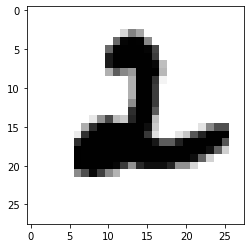

In [8]:
r = np.random.randint(0, X_train.shape[0])
plt.figure()
plt.imshow(X_train[r].reshape((28, 28)), cmap='gray_r')

In [9]:
X_train = X_train.reshape(X_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 1)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=NO_CLASSES, activation='softmax')
])

In [13]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)             

In [14]:
cnn.compile(optimizer=keras.optimizers.Adam(), 
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [15]:
history = cnn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 274s 8ms/step - loss: 0.2153 - accuracy: 0.9323 - val_loss: 0.0569 - val_accuracy: 0.9824
Epoch 2/5
33600/33600 [==============================] - 278s 8ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0486 - val_accuracy: 0.9848
Epoch 3/5
33600/33600 [==============================] - 267s 8ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 4/5
33600/33600 [==============================] - 266s 8ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0386 - val_accuracy: 0.9885
Epoch 5/5
33600/33600 [==============================] - 268s 8ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0398 - val_accuracy: 0.9892


In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

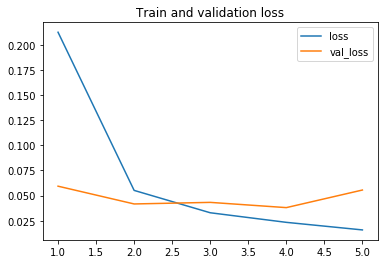

In [17]:
plt.plot(range(1, EPOCHS+1), loss, label='loss')
plt.plot(range(1, EPOCHS+1), val_loss, label='val_loss')
plt.title('Train and validation loss')
plt.legend()

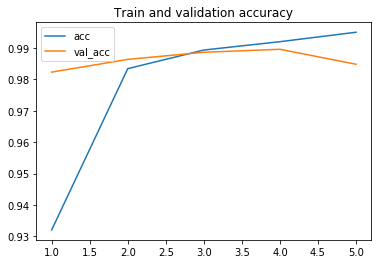

In [18]:
plt.plot(range(1, EPOCHS+1), acc, label='acc')
plt.plot(range(1, EPOCHS+1), val_acc, label='val_acc')
plt.title('Train and validation accuracy')
plt.legend()

In [21]:
import time
dir_ = 'cnn_checkpoint' + str(time.time()) + '.h5'
cnn.save(dir_)

In [22]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [23]:
y_pred = cnn_final_model.predict_classes(X_test)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
submission['Label'] = y_pred
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [25]:
submission.to_csv('submission.csv', index=False)

Prediction: 0


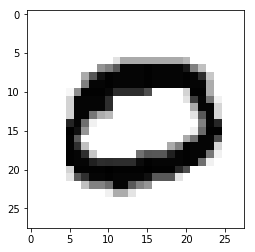

In [26]:
#Reviewing the test prediction
image_id = 1
plt.imshow(test_set.loc[image_id].values.reshape((28,28)), cmap='gray_r')
print('Prediction: ' + str(y_pred[image_id]))